# Random Walk + Variants strategy for creating space filling paths

Average path length: 38.15
Longest path: 138
Shortest path: 6


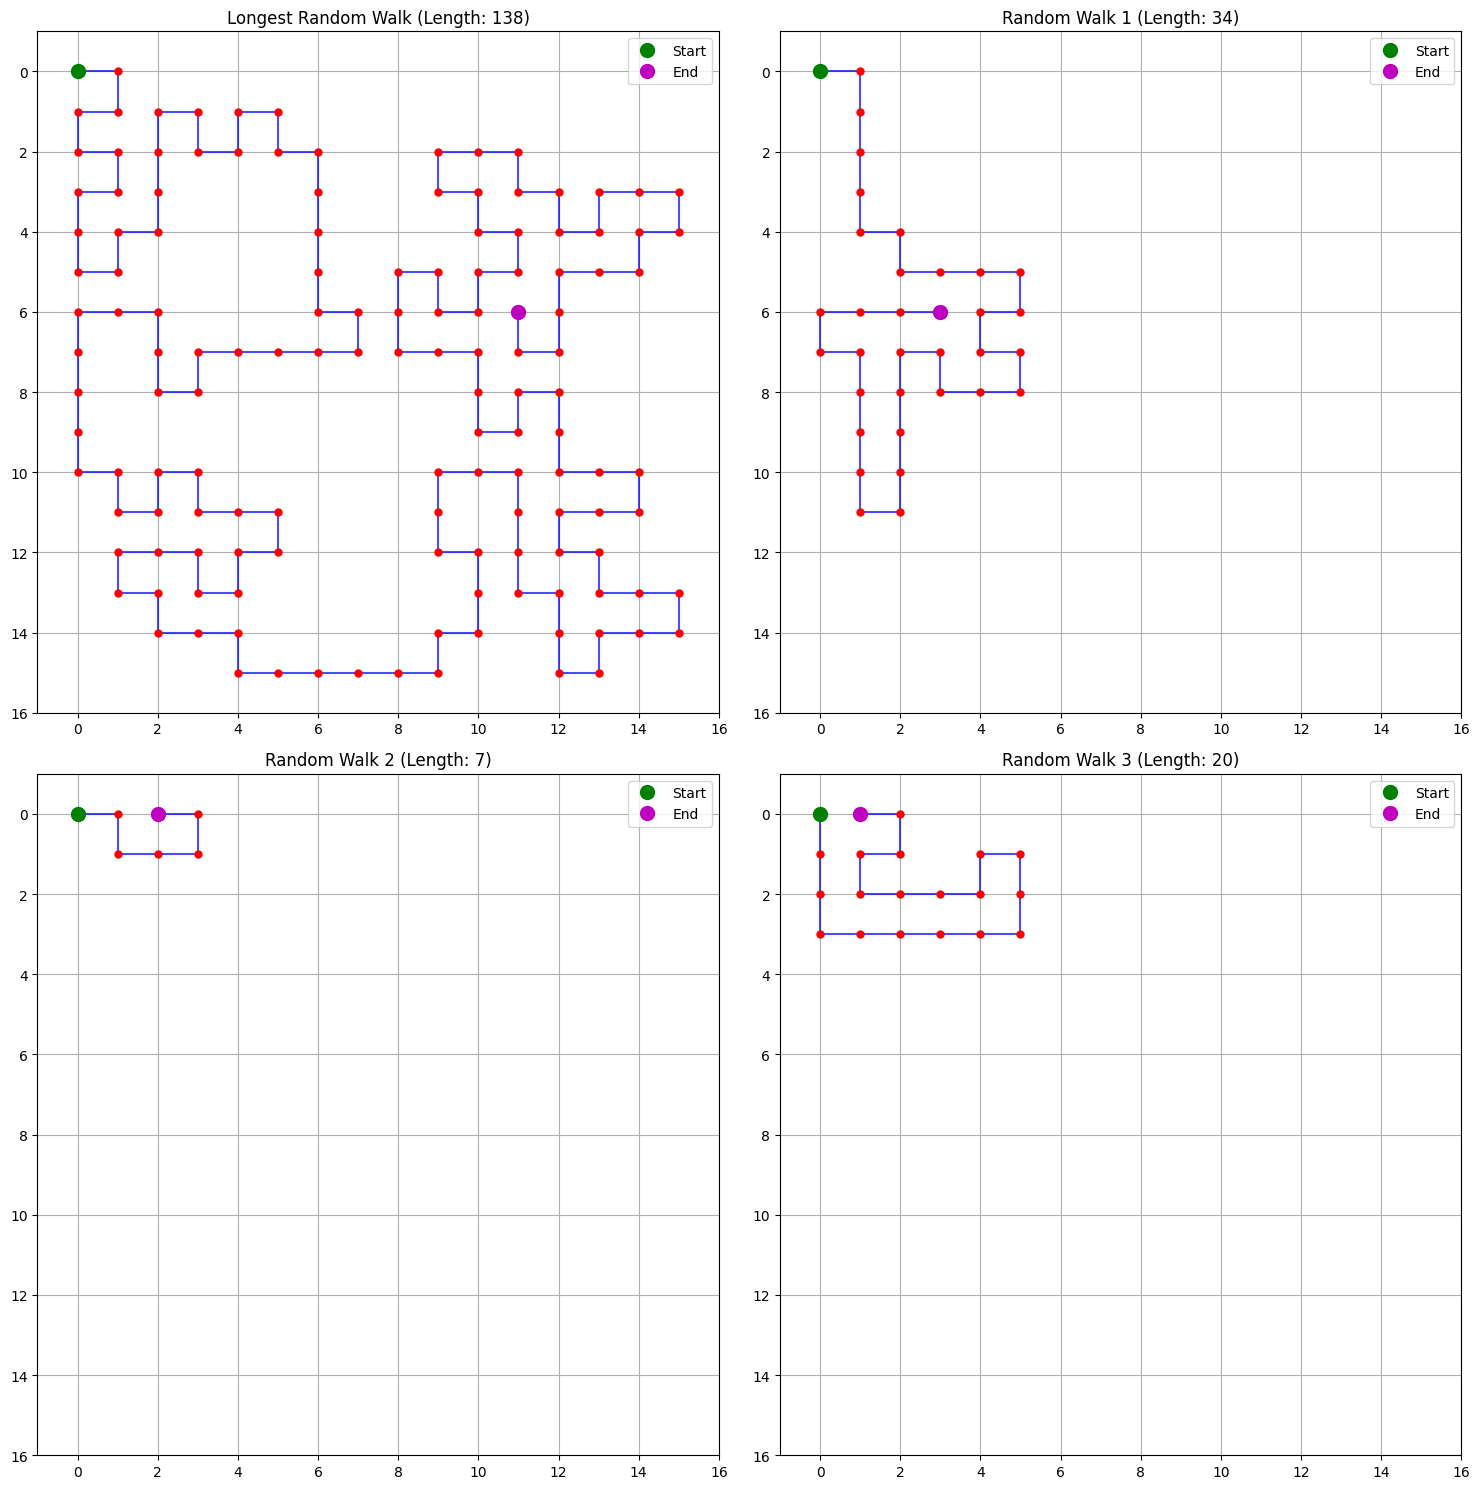

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Create a 16x16 grid (0 for unvisited, 1 for visited)
grid_size = 16
grid = np.zeros((grid_size, grid_size))

# Initialize the walk at the upper left corner
x, y = 0, 0
grid[y, x] = 1  # Mark as visited

# Parameters
num_attempts = 1000
path_lengths = []
all_paths = []  # Store all paths

for attempt in range(num_attempts):
    # Reset grid for new attempt
    grid = np.zeros((grid_size, grid_size))
    
    # Initialize the walk at the upper left corner
    x, y = 0, 0
    grid[y, x] = 1  # Mark as visited
    
    # Store the path for drawing
    path = [(x, y)]
    # Define possible moves (right, down, left, up)
    moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    
    # Stack for backtracking - store positions and available moves
    stack = []
    
    # Perform the random walk with backtracking
    while True:
        # Find valid moves (within bounds and not visited)
        valid_moves = []
        for dx, dy in moves:
            new_x, new_y = x + dx, y + dy
            # Check if move is within bounds and not visited
            if (0 <= new_x < grid_size and 
                0 <= new_y < grid_size and 
                grid[new_y, new_x] == 0):
                valid_moves.append((dx, dy))
        
        # If valid moves exist
        if valid_moves:
            dx, dy = random.choice(valid_moves)
            # Make the move
            x, y = x + dx, y + dy
            grid[y, x] = 1  # Mark as visited
            path.append((x, y))
        
        
        # If no valid moves and no backtracking options, end walk
        else:
            break
    
    # Store the path length and the path itself
    path_lengths.append(len(path))
    all_paths.append(path)

print(f"Average path length: {np.mean(path_lengths):.2f}")
print(f"Longest path: {max(path_lengths)}")
print(f"Shortest path: {min(path_lengths)}")

# Get the longest path
longest_path_idx = path_lengths.index(max(path_lengths))
longest_path = all_paths[longest_path_idx]

# Create a 2x2 subplot
plt.figure(figsize=(15, 15))

# Plot the longest path in the first subplot
plt.subplot(2, 2, 1)
x_coords, y_coords = zip(*longest_path)
plt.plot(x_coords, y_coords, 'b-', alpha=0.7)
plt.plot(x_coords, y_coords, 'ro', markersize=5)
plt.plot(x_coords[0], y_coords[0], 'go', markersize=10, label='Start')
plt.plot(x_coords[-1], y_coords[-1], 'mo', markersize=10, label='End')
plt.grid(True)
plt.title(f'Longest Random Walk (Length: {len(longest_path)})')
plt.legend()
plt.axis([-1, grid_size, -1, grid_size])
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()  # To match array coordinates

# Plot 3 random paths in the other subplots
for i, subplot_idx in enumerate(range(2, 5)):
    # Pick a random path that's not the longest
    random_paths = [idx for idx, length in enumerate(path_lengths) if idx != longest_path_idx]
    random_path_idx = random.choice(random_paths)
    random_path = all_paths[random_path_idx]
    
    plt.subplot(2, 2, subplot_idx)
    x_coords, y_coords = zip(*random_path)
    plt.plot(x_coords, y_coords, 'b-', alpha=0.7)
    plt.plot(x_coords, y_coords, 'ro', markersize=5)
    plt.plot(x_coords[0], y_coords[0], 'go', markersize=10, label='Start')
    plt.plot(x_coords[-1], y_coords[-1], 'mo', markersize=10, label='End')
    plt.grid(True)
    plt.title(f'Random Walk {i+1} (Length: {len(random_path)})')
    plt.legend()
    plt.axis([-1, grid_size, -1, grid_size])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


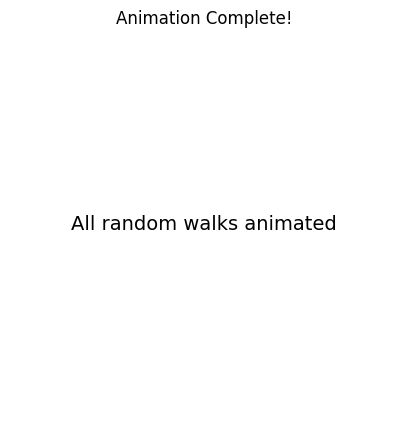

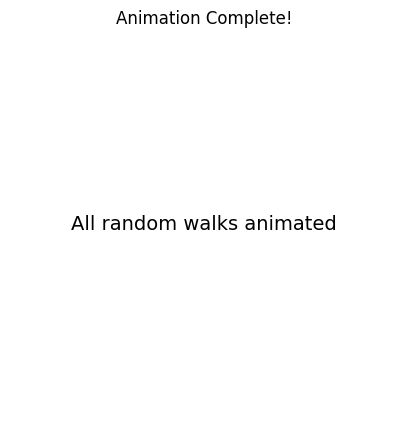

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import time

import matplotlib.pyplot as plt

# Initialize the figure
plt.figure(figsize=(5, 5))

# Define how many random walks to animate
num_walks_to_animate = 5
walks_to_animate = path_lengths[:num_walks_to_animate]

for i, path in enumerate(all_paths[:num_walks_to_animate]):
    # Clear the previous plot
    plt.clf()
    
    # Set up grid and title
    plt.grid(True)
    plt.title(f'Random Walk Animation {i+1}/{num_walks_to_animate} (Final length: {len(path)})')
    plt.axis([-1, grid_size, -1, grid_size])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis()  # To match array coordinates
    
    # Animate the path being drawn
    for step in range(1, len(path) + 1):
        # Extract coordinates up to current step
        x_coords, y_coords = zip(*path[:step])
        
        # Clear and redraw
        plt.clf()
        plt.grid(True)
        plt.title(f'Random Walk Animation {i+1}/{num_walks_to_animate} (Step: {step}/{len(path)})')
        
        # Plot the path up to current step
        plt.plot(x_coords, y_coords, 'b-', alpha=0.7)
        plt.plot(x_coords, y_coords, 'ro', markersize=5)
        
        # Mark start and current position
        plt.plot(x_coords[0], y_coords[0], 'go', markersize=10, label='Start')
        plt.plot(x_coords[-1], y_coords[-1], 'mo', markersize=8, label='Current')
        
        plt.legend()
        plt.axis([-1, grid_size, -1, grid_size])
        plt.gca().set_aspect('equal', adjustable='box')
        plt.gca().invert_yaxis()
        
        # Display and pause
        display(plt.gcf())
        clear_output(wait=True)
        # time.sleep(0.01)  # Adjust speed of animation
    
    # Show final result for a bit longer
    # time.sleep(1)

# Final display
plt.clf()
plt.title("Animation Complete!")
plt.text(0.5, 0.5, "All random walks animated", 
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=14)
plt.axis('off')
display(plt.gcf())